# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from joblib import dump
from scipy.stats import chi2_contingency

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Try reading local file first; if not found, download from UCI repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
df = pd.read_csv(url, header=None)

df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [3]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
print(df.shape)
print(df.isnull().sum())

(1728, 7)
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


***Distribusi Target***

In [7]:
df["class"].value_counts(normalize=True)

class
unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: proportion, dtype: float64

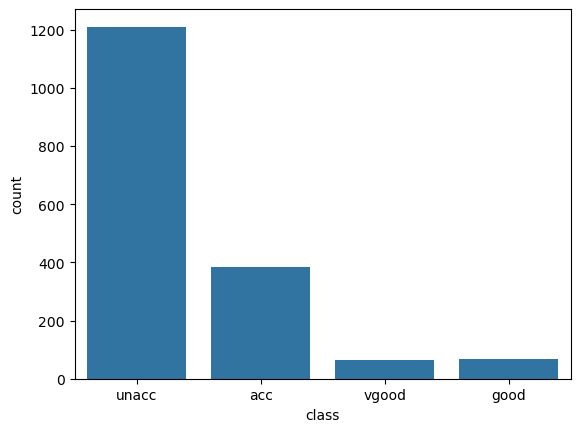

In [8]:
sns.countplot(data=df, x="class")
plt.show()

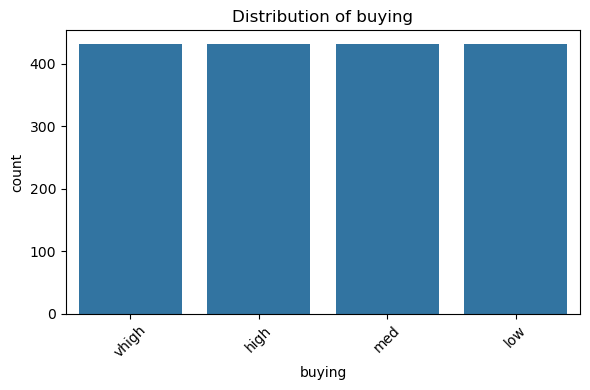


Distribution (proportion) for buying:
buying
vhigh    0.25
high     0.25
med      0.25
low      0.25
Name: proportion, dtype: float64


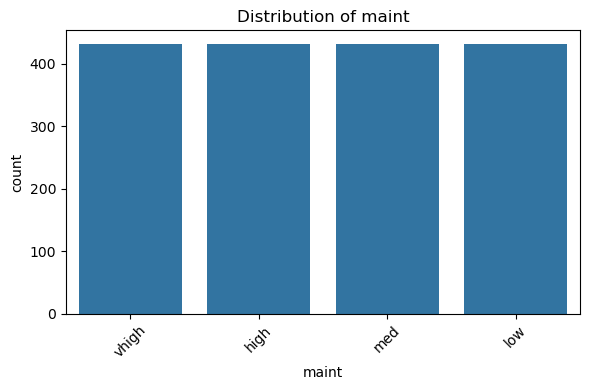


Distribution (proportion) for maint:
maint
vhigh    0.25
high     0.25
med      0.25
low      0.25
Name: proportion, dtype: float64


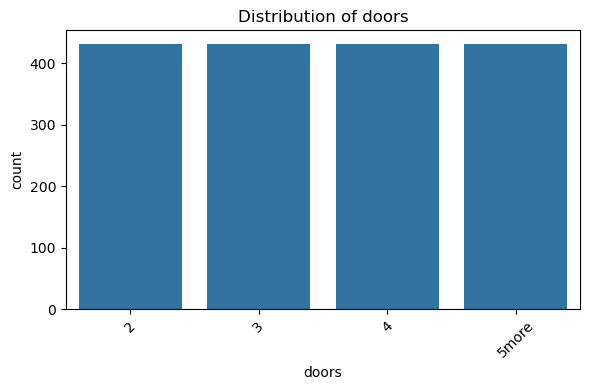


Distribution (proportion) for doors:
doors
2        0.25
3        0.25
4        0.25
5more    0.25
Name: proportion, dtype: float64


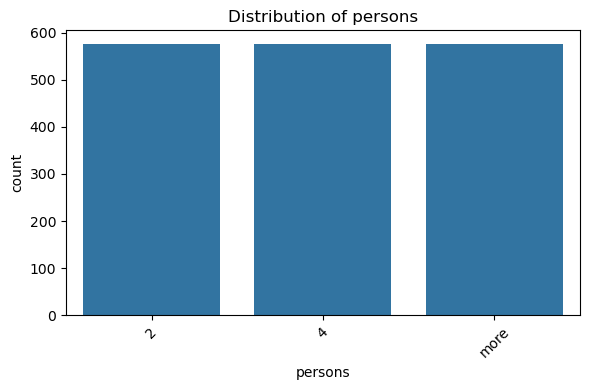


Distribution (proportion) for persons:
persons
2       0.333333
4       0.333333
more    0.333333
Name: proportion, dtype: float64


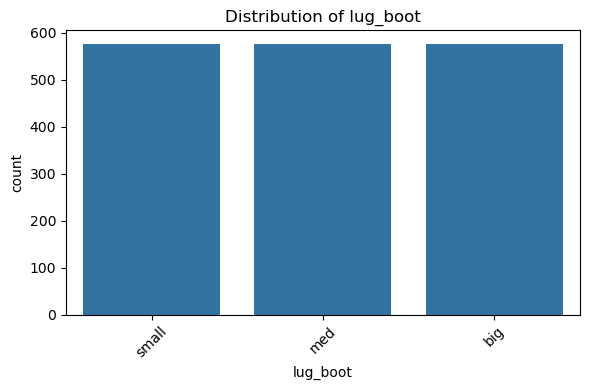


Distribution (proportion) for lug_boot:
lug_boot
small    0.333333
med      0.333333
big      0.333333
Name: proportion, dtype: float64


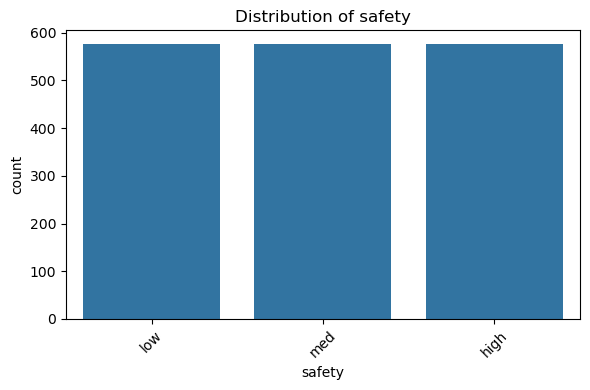


Distribution (proportion) for safety:
safety
low     0.333333
med     0.333333
high    0.333333
Name: proportion, dtype: float64


In [9]:
categorical_features = df.columns.drop("class")

for col in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print(f"\nDistribution (proportion) for {col}:")
    print(df[col].value_counts(normalize=True))


***Mengetahui fitur paling diskriminatif***

In [10]:
chi2_results = []

for col in categorical_features:
    contingency_table = pd.crosstab(df[col], df["class"])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    chi2_results.append({
        "feature": col,
        "chi2_stat": chi2,
        "p_value": p
    })

chi2_df = pd.DataFrame(chi2_results).sort_values(
    by="chi2_stat", ascending=False
)

chi2_df

,feature,chi2_stat,p_value
5,safety,479.322440,2.389155e-100
3,persons,371.336728,4.039968e-77
0,buying,189.243010,5.928063e-36
1,maint,142.940530,2.547652e-26
4,lug_boot,53.282025,1.029440e-09
2,doors,10.384780,3.202422e-01


***Visualisasi Distribusi Target Per Fitur***

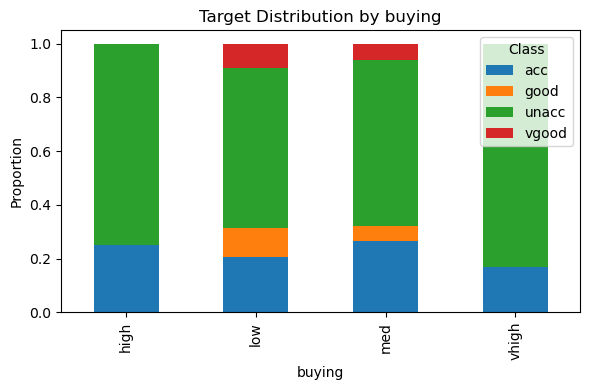

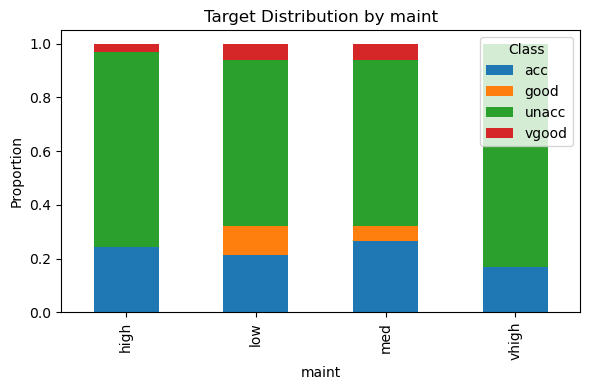

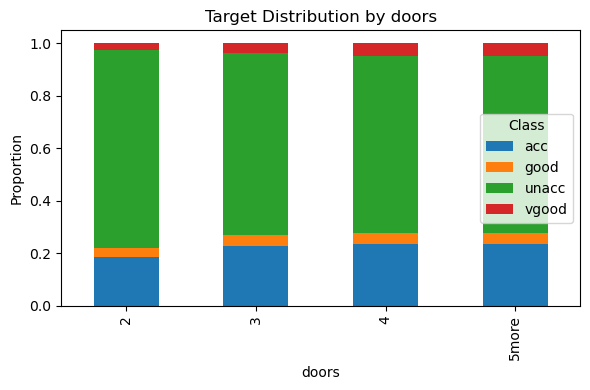

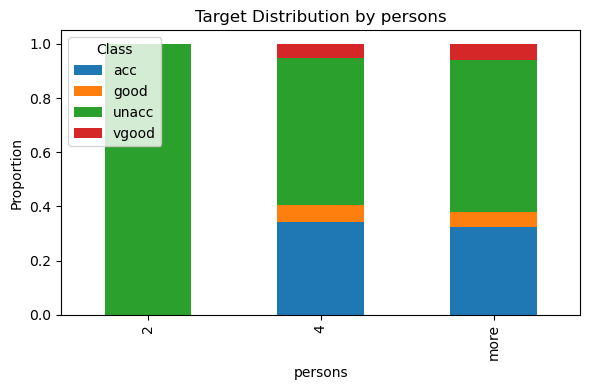

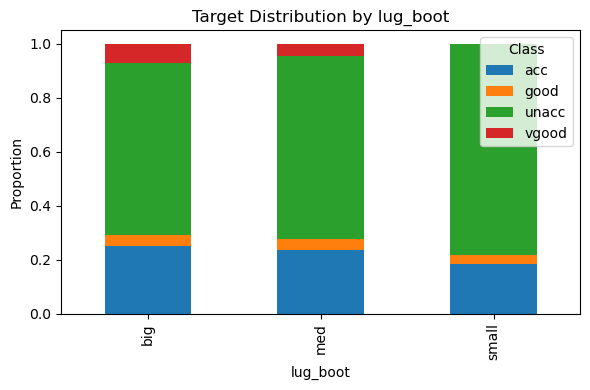

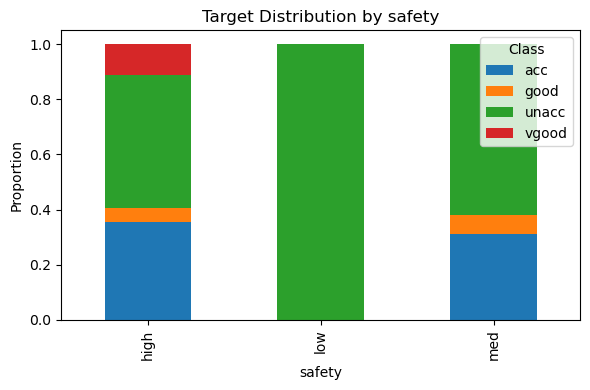

In [11]:
for col in df.columns.drop("class"):
    ct = pd.crosstab(df[col], df["class"], normalize="index")

    ct.plot(
        kind="bar",
        stacked=True,
        figsize=(6, 4)
    )
    plt.title(f"Target Distribution by {col}")
    plt.ylabel("Proportion")
    plt.legend(title="Class")
    plt.tight_layout()
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

***Pisahkan Fitur dan Target***

In [12]:
target_column = "class"

X = df.drop(columns=[target_column])
y = df[target_column]

print(X.head())
print(y.value_counts())

  buying  maint doors persons lug_boot safety
0  vhigh  vhigh     2       2    small    low
1  vhigh  vhigh     2       2    small    med
2  vhigh  vhigh     2       2    small   high
3  vhigh  vhigh     2       2      med    low
4  vhigh  vhigh     2       2      med    med
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


***Preprocessing Pipeline***

In [13]:
categorical_features = X.columns.tolist()

categorical_transformer = Pipeline(steps=[("encoder", OrdinalEncoder())])

preprocessor = ColumnTransformer(transformers=[("cat", categorical_transformer, categorical_features)])

***Encode Target***

In [14]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

pd.DataFrame({
    "original": y[:10],
    "encoded": y_encoded[:10]
})

,original,encoded
0,unacc,2
1,unacc,2
2,unacc,2
3,unacc,2
4,unacc,2
5,unacc,2
6,unacc,2
7,unacc,2
8,unacc,2
9,unacc,2


***Split Dataset***

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.3,
    random_state=42,
    stratify=y_encoded
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (1209, 6)
Test shape: (519, 6)


***Run Preprocessing***

In [16]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

X_train_processed[:5]

array([[3., 3., 3., 2., 2., 0.],
       [0., 1., 3., 0., 0., 2.],
       [1., 3., 2., 1., 2., 0.],
       [1., 2., 2., 2., 2., 1.],
       [0., 0., 0., 2., 0., 0.]])

***Konversi ke dataframe***

In [17]:
X_train_processed_df = pd.DataFrame(
    X_train_processed,
    columns=categorical_features
)

X_train_processed_df.head()

,buying,maint,doors,persons,lug_boot,safety
0,3.0,3.0,3.0,2.0,2.0,0.0
1,0.0,1.0,3.0,0.0,0.0,2.0
2,1.0,3.0,2.0,1.0,2.0,0.0
3,1.0,2.0,2.0,2.0,2.0,1.0
4,0.0,0.0,0.0,2.0,0.0,0.0


In [18]:
# Buat DataFrame target (encoded)
y_train_df = pd.DataFrame(
    y_train,
    columns=["class"]
)

# Reset index agar aman saat concat
X_train_processed_df = X_train_processed_df.reset_index(drop=True)
y_train_df = y_train_df.reset_index(drop=True)

# Gabungkan fitur + target
train_encoded_df = pd.concat(
    [X_train_processed_df, y_train_df],
    axis=1
)

# Simpan ke CSV
train_encoded_df.to_csv(
    "car_evaluation_train_encoded.csv",
    index=False
)

In [19]:
X_test_processed_df = pd.DataFrame(
    X_test_processed,
    columns=categorical_features
)

y_test_df = pd.DataFrame(
    y_test,
    columns=["class"]
)

X_test_processed_df = X_test_processed_df.reset_index(drop=True)
y_test_df = y_test_df.reset_index(drop=True)

test_encoded_df = pd.concat(
    [X_test_processed_df, y_test_df],
    axis=1
)

test_encoded_df.to_csv(
    "car_evaluation_test_encoded.csv",
    index=False
)